In [12]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [13]:
train_path="Downloads/slides/deep learning/train2"
test_path="Downloads/slides/deep learning/test2"
val_path="Downloads/slides/deep learning/valid2"

In [14]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [15]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [16]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 1720 images belonging to 2 classes.
Found 538 images belonging to 2 classes.
Found 428 images belonging to 2 classes.


In [19]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [20]:
training_set.class_indices

{'ain': 0, 'al': 1}

In [21]:
train_y.shape,test_y.shape,val_y.shape

((1720,), (538,), (428,))

In [22]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [23]:
for layer in vgg.layers:
    layer.trainable = False

In [24]:
x = Flatten()(vgg.output)

In [25]:
prediction = Dense(2, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [29]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=20,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

54/54 [==============================] - 555s 10s/step - loss: 0.1253 - accuracy: 0.9500 - val_loss: 0.0062 - val_accuracy: 1.0000


In [30]:
model.evaluate(test_x,test_y,batch_size=32)

17/17 [==============================] - 130s 8s/step - loss: 0.0161 - accuracy: 1.0000


[0.016102518886327744, 1.0]

In [31]:
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

In [32]:
from tensorflow.keras.preprocessing import image as image_utils

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    n = np.argmax(preds)
    if n == 0 :
        print('حرف : ع')
    else :
        print('حرف : لا')
    return preds

(64, 64)
1/1 [==============================] - 1s 505ms/step
حرف : ع


array([[1.0000000e+00, 3.2355984e-29]], dtype=float32)

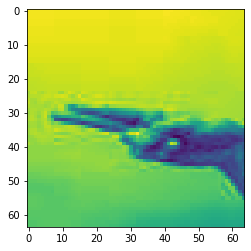

In [33]:
make_predictions('Downloads/slides/deep learning/test2/ain/AIN (1691).jpg')

In [34]:
model.save('Downloads/slides/deep learning')

INFO:tensorflow:Assets written to: Downloads/slides/deep learning\assets


INFO:tensorflow:Assets written to: Downloads/slides/deep learning\assets
